# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 
* Student Name:
* Student Net ID:
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: 

# The Monte Carlo Module

In [76]:
import numpy as np
import pandas as pd
import random
import array as arr
import matplotlib.pyplot as plt

In [77]:
class Die():
    """This class creates a die with face values and weights, offers you the ability to change the weights, and rolls the die and outputs the value"""

    def __init__(self,faces):
        self.faces = faces
        self.weights = [1] * len(faces)
        self._die = pd.DataFrame({'faces': self.faces, 'weights': self.weights})
    
    def change_weight(self, side, new_weight):
        """
        PURPOSE: Change a face value's weight, which is defaulted to 1. 
    
        INPUTS
        side: the face value whose weight you would like changed, same data type used to initialize the die
        new_weight: the value of the new weight, int
    
        OUTPUT
        self._die: a private dataframe of the die's face values and their corresponding weights in each row
        """
        self.side=side
        self.new_weight=new_weight
        for i in self._die.faces:
            if i == self.side: 
                location = self._die.faces[self._die.faces == i].index.values
                self._die.loc[location,'weights'] = new_weight
            continue
        return self._die                
            
    def roll_die(self, rolls=1):
        """
        PURPOSE: Roll the die and show the result 
    
        INPUTS
        none
    
        OUTPUT
        outcomes: a dataframe of the roll number and the results of the die
        """
        self.rolls = rolls
        outcomes = []
        for i in range(self.rolls):
            result = self._die.faces.sample(weights=self._die.weights).values[0]
            outcomes.append(result)
        return outcomes
    
    def current_die(self):
        """
        PURPOSE: Return the values of the current die
    
        INPUTS
        none
    
        OUTPUT
        self_die: a private dataframe of die's face values and their corresponding weights in each row
        """
        return self._die

In [78]:
class Game():
    """This class takes a list of dice, rolls them, and outputs the results of the rolls"""
    
    def __init__(self, dice):
        self.dice=dice
    
    def play(self, rolls):
        """
        PURPOSE: Roll all of the dice objects and show the results
    
        INPUTS
        rolls: number of times to roll the dice objects, int
    
        OUTPUT
        self._result: the result of the game in a private data frame, roll number by die object
        """
        self.rolls = rolls
        results = []
        a=0
        roll_count=[]
        for y in self.dice:
            for x in range(self.rolls):
                die_result=() 
                z = len(self.dice)-1
                die_result = random.choices(self.dice[z].faces, weights = self.dice[z].weights)
                results.extend(die_result) 
                z+=1
        outcomes = pd.Series(results)
        vals = outcomes.values 
        final_outcome = vals.reshape(self.rolls,len(self.dice)) 
        self._result = pd.DataFrame(final_outcome)
        self._result.columns = [f'die_{i+1}' for i in self._result.columns]
        for h in range(len(self._result)):
            a+=1
            roll_count.append(a)
        self._result['Roll Number']=roll_count
        self._result.set_index('Roll Number', inplace=True)
        return self._result
    
    def show(self, form):
        """
        PURPOSE: Display the results of the game by either a narrow or wide dataframe
    
        INPUTS
        form: either "wide" or "narrow", str
    
        OUTPUT
        a dataframe in either wide or narrow form, showing the result of the roll for each die object and the roll number
        """
        self.form = form
        if self.form == 'wide':
            return self._result
        elif self.form == 'narrow':
            df = pd.DataFrame()
            for y in self._result:
                df = pd.DataFrame(self._result.stack())
                df.columns = ['Face Rolled']
            return df
        else:
            print('please only input narrow or wide to indicate which form to receive the results of the game')

In [79]:
class Analyzer():
    """This class takes the result of a game and analyzes it for jackpots, unique combinations, and frequency of face values"""
    
    def __init__(self, game):
        self.game = pd.DataFrame(game.show('wide'))
        
    def jackpot(self):
        """
        PURPOSE: Calculates the number of jackpots in all of the games played
    
        INPUTS
        none
    
        OUTPUT
        count: int of total number of jackpots
        """
        self.game.eq(self.game.iloc[:, 0], axis=0)
        self.jackpot = self.game.copy()
        self.jackpot['Jackpot'] = self.jackpot.eq(self.jackpot.iloc[:, 0], axis=0).all(1)
        try:
            count = self.jackpot['Jackpot'].value_counts()[True]
            return count
        except:
            return 0
    
    def combo(self):
        """
        PURPOSE: To count and display the number of unique combinations of dice objects
    
        INPUTS
        none
    
        OUTPUT
        output: a dataframe with an index of the unique combinations and a column with a count of their frequency 
        """
        combo_df = self.game.copy()
        output = pd.DataFrame(np.sort(combo_df.values, axis=1), columns=combo_df.columns).value_counts().reset_index(name='counts')
        return output
    
    def face_count(self):
        """
        PURPOSE: Display the frequency of die object face values per roll number
    
        INPUTS
        none
    
        OUTPUT
        face_count_df: a dataframe with each face value as a column and its frequency for each roll number
        """
        columns = []
        for x in self.game.columns:
            columns.append(x)
        self.game=pd.DataFrame(self.game.stack())
        self.game.columns = ['Face Rolled' for i in self.game.columns]
        face_count_df = pd.DataFrame(self.game)
        face_count_df = face_count_df.reset_index().pivot_table(index='Roll Number', columns='Face Rolled', aggfunc='count').fillna(0)
        return face_count_df

# Test Module

# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [80]:
fair_coin = Die(['H','T'])

In [81]:
fair_coin.current_die()

,faces,weights
0,H,1
1,T,1


In [82]:
unfair_coin = Die(['H', 'T'])

In [83]:
unfair_coin.change_weight('H',5)

,faces,weights
0,H,5
1,T,1


In [84]:
coins1 = [fair_coin, fair_coin]

In [85]:
coin_game1 = Game(coins1)

In [86]:
coin_game1.play(1000)

,die_1,die_2
Roll Number,,
1,H,H
2,H,T
3,T,T
4,H,T
5,H,H
...,...,...
996,H,T
997,T,T
998,T,H


In [202]:
game_results1 = Analyzer(coin_game1)

In [203]:
game_results1.jackpot()

495

In [179]:
j = game_results1.jackpot()

In [183]:
freq_fair_game = j / 1000

In [184]:
freq_fair_game

0.495

In [93]:
coins2 = [fair_coin, unfair_coin]

In [94]:
coin_game2 = Game(coins2)

In [95]:
coin_game2.play(1000)

,die_1,die_2
Roll Number,,
1,T,T
2,H,T
3,H,T
4,H,H
5,H,T
...,...,...
996,T,T
997,T,H
998,H,H


In [224]:
game2_results = Analyzer(coin_game2)

In [206]:
game2_results.jackpot()

484

In [225]:
j2 = game2_results.jackpot()

In [226]:
freq_unfair_game = j2/1000

In [227]:
freq_unfair_game

0.484

<AxesSubplot:>

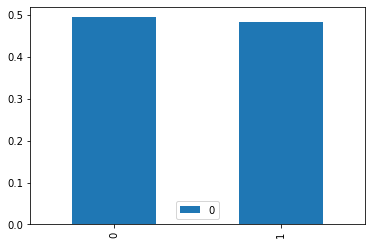

In [228]:
results = pd.DataFrame([freq_fair_game, freq_unfair_game])
results.sort_index().plot.bar()

## Scenario 2

In [102]:
die_1 = Die([1,2,3,4,5,6])

In [103]:
die_1.change_weight(6,5)

,faces,weights
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,5


In [104]:
die_2 = Die([1,2,3,4,5,6])

In [105]:
die_2.change_weight(1,5)

,faces,weights
0,1,5
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1


In [106]:
die_3 = Die([1,2,3,4,5,6])

In [107]:
die_3.current_die()

,faces,weights
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1


In [108]:
fair_dice = [die_3, die_3, die_3, die_3, die_3, die_3]

In [109]:
dicegame1 = Game(fair_dice)

In [110]:
dicegame1.play(1000)

,die_1,die_2,die_3,die_4,die_5,die_6
Roll Number,,,,,,
1,5,1,2,3,2,6
2,5,2,1,5,3,3
3,5,6,5,6,4,2
4,4,6,1,4,5,6
5,1,1,3,2,3,5
...,...,...,...,...,...,...
996,6,1,3,5,6,2
997,6,2,4,2,2,2
998,1,4,4,3,3,4


In [111]:
dicegame1_results = Analyzer(dicegame1)

In [112]:
jackpot_fair = dicegame1_results.jackpot()

In [113]:
jackpot_fair

0

In [114]:
freq_fair = jackpot_fair/1000

In [115]:
freq_fair

0.0

In [116]:
dicegame1_results.combo()

,die_1,die_2,die_3,die_4,die_5,die_6,counts
0,1,2,3,4,5,6,19
1,1,2,3,5,6,6,15
2,1,3,4,5,5,6,12
3,1,1,2,3,4,6,12
4,1,2,4,4,5,6,11
...,...,...,...,...,...,...,...
331,1,4,4,4,4,6,1
332,1,4,4,4,4,5,1
333,1,3,5,6,6,6,1
334,1,3,4,5,5,5,1


In [236]:
freq_combos1 = dicegame1_results.combo()

In [237]:
freq_combos1[:10]

,die_1,die_2,die_3,die_4,die_5,die_6,counts
0,1,2,3,4,5,6,19
1,1,2,3,5,6,6,15
2,1,3,4,5,5,6,12
3,1,1,2,3,4,6,12
4,1,2,4,4,5,6,11
5,1,1,3,4,5,6,10
6,1,1,4,5,5,6,9
7,1,3,4,4,5,6,9
8,1,2,4,5,6,6,9
9,1,2,2,3,4,5,9


In [258]:
top10_1 = freq_combos1[:10]

<AxesSubplot:>

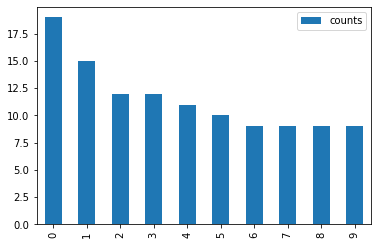

In [259]:
top10_1.plot.bar(y='counts')

In [117]:
unfair_dice = [die_1, die_1, die_2, die_3, die_3, die_3]

In [118]:
dicegame2 = Game(unfair_dice)

In [119]:
dicegame2.play(1000)

,die_1,die_2,die_3,die_4,die_5,die_6
Roll Number,,,,,,
1,5,1,5,5,5,2
2,6,5,1,2,6,2
3,4,3,5,4,3,3
4,1,5,6,3,6,2
5,5,1,2,2,5,4
...,...,...,...,...,...,...
996,1,2,2,1,6,4
997,2,6,5,1,3,1
998,6,1,3,5,3,1


In [120]:
dicegame2_result = Analyzer(dicegame2)

In [121]:
jackpot_unfair = dicegame2_result.jackpot()

In [122]:
jackpot_unfair

0

In [123]:
freq_unfair = jackpot_unfair/1000

In [124]:
freq_unfair

0.0

In [125]:
dicegame2_result.combo()

,die_1,die_2,die_3,die_4,die_5,die_6,counts
0,1,2,3,4,5,6,16
1,1,2,2,3,5,6,15
2,1,1,2,3,5,6,14
3,1,2,3,3,5,6,12
4,1,2,3,5,5,6,12
...,...,...,...,...,...,...,...
319,1,4,4,4,5,5,1
320,1,4,4,4,4,5,1
321,1,3,6,6,6,6,1
322,1,3,5,6,6,6,1


<AxesSubplot:>

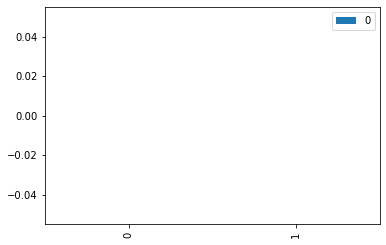

In [126]:
results_dice = pd.DataFrame([freq_fair, freq_unfair])
results_dice.sort_index().plot.bar()

In [127]:
freq_combos2 = dicegame2_result.combo()

In [128]:
freq_combos2[:10]

,die_1,die_2,die_3,die_4,die_5,die_6,counts
0,1,2,3,4,5,6,16
1,1,2,2,3,5,6,15
2,1,1,2,3,5,6,14
3,1,2,3,3,5,6,12
4,1,2,3,5,5,6,12
5,1,2,2,3,4,5,11
6,1,3,3,4,5,6,10
7,2,2,3,5,5,6,9
8,1,2,3,4,5,5,9
9,2,3,3,4,5,6,9


In [251]:
top10_2 = freq_combos2[:10]

<AxesSubplot:>

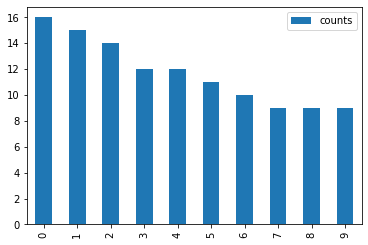

In [257]:
top10_2.plot.bar(y='counts')

## Scenario 3

In [130]:
die = Die(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

In [131]:
die.change_weight('a', 8.4966)

,faces,weights
0,a,8.4966
1,b,1.0000
2,c,1.0000
3,d,1.0000
4,e,1.0000
5,f,1.0000
6,g,1.0000
7,h,1.0000
8,i,1.0000
9,j,1.0000


In [132]:
die.change_weight('b', 2.0720)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,1.0000
3,d,1.0000
4,e,1.0000
5,f,1.0000
6,g,1.0000
7,h,1.0000
8,i,1.0000
9,j,1.0000


In [133]:
die.change_weight('c', 4.5388)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,1.0000
4,e,1.0000
5,f,1.0000
6,g,1.0000
7,h,1.0000
8,i,1.0000
9,j,1.0000


In [134]:
die.change_weight('d', 3.3844)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,1.0000
5,f,1.0000
6,g,1.0000
7,h,1.0000
8,i,1.0000
9,j,1.0000


In [135]:
die.change_weight('e', 11.1607)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.0000
6,g,1.0000
7,h,1.0000
8,i,1.0000
9,j,1.0000


In [136]:
die.change_weight('f', 1.8121)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,1.0000
7,h,1.0000
8,i,1.0000
9,j,1.0000


In [137]:
die.change_weight('g', 2.4705)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,1.0000
8,i,1.0000
9,j,1.0000


In [138]:
die.change_weight('h', 3.0034)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,1.0000
9,j,1.0000


In [139]:
die.change_weight('i', 7.5448)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,1.0000


In [140]:
die.change_weight('j', 0.1965)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [141]:
die.change_weight('k', 1.1016)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [142]:
die.change_weight('l', 5.4893)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [143]:
die.change_weight('m', 3.0129)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [144]:
die.change_weight('n', 6.6544)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [145]:
die.change_weight('o', 7.1635)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [146]:
die.change_weight('p', 3.1671)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [147]:
die.change_weight('q', 0.1962)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [148]:
die.change_weight('r', 7.5809)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [149]:
die.change_weight('s', 5.7351)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [150]:
die.change_weight('t', 6.9509)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [151]:
die.change_weight('u', 3.6308)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [152]:
die.change_weight('v', 1.0074)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [153]:
die.change_weight('w', 1.2899)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [154]:
die.change_weight('x', 0.2902)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [155]:
die.change_weight('y', 1.7779)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [156]:
die.change_weight('z', 0.2722)

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [157]:
alphabet = [die, die, die, die, die]

In [158]:
wordgame = Game(alphabet)

In [159]:
wordgame.play(1000)

,die_1,die_2,die_3,die_4,die_5
Roll Number,,,,,
1,i,v,a,a,y
2,j,v,s,x,s
3,q,q,h,y,a
4,a,i,s,w,q
5,g,n,j,r,r
...,...,...,...,...,...
996,g,b,m,x,i
997,p,q,o,w,i
998,c,d,q,e,k


In [160]:
wordgame_results = Analyzer(wordgame)

In [161]:
combos = wordgame_results.combo()

In [162]:
combos

,die_1,die_2,die_3,die_4,die_5,counts
0,h,i,l,o,p,2
1,d,e,k,n,v,2
2,g,i,p,r,z,2
3,f,g,j,s,w,2
4,c,c,f,t,y,1
...,...,...,...,...,...,...
991,f,h,j,l,t,1
992,f,h,j,j,x,1
993,f,g,p,u,y,1
994,f,g,p,r,s,1


In [163]:
# Not many appear to be actual English words from what I can see in the dataframe

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [ ]:
!ls -lRF -o

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.